## Observations and Insights 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Might need to use outer join to clear all duplicate
mouse_study_merge = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
mouse_study_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = mouse_study_merge['Mouse ID'].nunique()
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_merge['Mouse ID'].value_counts().head()

g989    13
w151    10
s565    10
j984    10
m269    10
Name: Mouse ID, dtype: int64

In [4]:
# https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving
mouse_study_index = mouse_study_merge.set_index('Mouse ID')
cleaned_mouse_study = mouse_study_index.drop(index = 'g989')
mouse_study = cleaned_mouse_study.reset_index()
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# duplicate_mouse = mouse_study_merge where mouse ID = g989
# mouse_study = mouse_study_merge.set_index('Mouse ID')
# g989 = mouse_study.loc['g989', :]

# mouse_study.drop(index = 'g989')
# mouse_study.reset_index()
# g989
# mouse_study = mouse_study_merge.set_index('Mouse ID')
# mouse_study.drop(index = 'g989')
# mouse_study.reset_index()


# cleaned_mouse_study = mouse_study_merge.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
# cleaned_mouse_study

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_mouse_study = mouse_id_index.drop(index = 'g989')


In [7]:
# Checking the number of mice in the clean DataFrame.
# new_duplicate_check = cleaned_mouse_study['Mouse ID'].value_counts()
new_number_of_mice = mouse_study['Mouse ID'].nunique()
# print(new_duplicate_check.head())
print(new_number_of_mice)

248


In [8]:
# Group cleaned_mouse_study by regimen
grouped_regimen = mouse_study.groupby('Drug Regimen')

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol_mean = grouped_regimen['Tumor Volume (mm3)'].mean()
tumor_vol_median = grouped_regimen['Tumor Volume (mm3)'].median()
tumor_vol_variance = grouped_regimen['Tumor Volume (mm3)'].var()
tumor_vol_std = grouped_regimen['Tumor Volume (mm3)'].std()
tumor_vol_sem = grouped_regimen['Tumor Volume (mm3)'].sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol_summary = pd.DataFrame({'Tumor Vol Mean': tumor_vol_mean,
                                'Tumor Vol Median': tumor_vol_median,
                                'Tumor Vol Variance': tumor_vol_variance,
                                'Tumor Vol Standard Deviation': tumor_vol_std,
                                'Tumor Vol SEM': tumor_vol_sem})
# This method produces everything in a single groupby function
tumor_vol_summary

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Standard Deviation,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

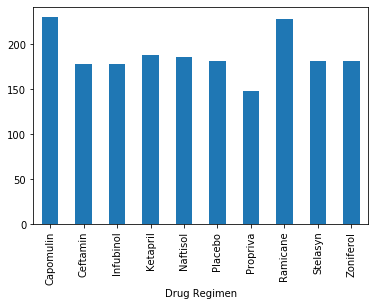

In [20]:
# panda_bar = mouse_study.groupby(['Mouse ID','Drug Regimen'])
# mouse_count = grouped_regimen['Mouse ID'].count()
# regimen_type = grouped_regimen['Drug Regimen']

# panda_bar_columns = mouse_study[['Mouse ID', 'Drug Regimen']]
mouse_count = grouped_regimen['Mouse ID'].count()
x_axis = np.arange(len(grouped_regimen))

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
panda_plot = mouse_count.plot(kind="bar")

<BarContainer object of 10 artists>

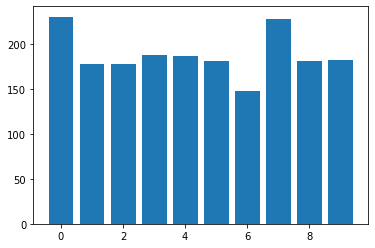

In [21]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(x_axis, mouse_count)

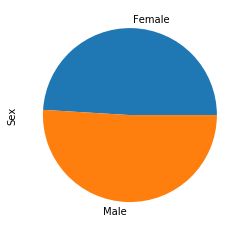

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender_group = mouse_study.groupby(['Sex'])
gender_count = mouse_gender_group['Sex'].count()

gender_dist_pie_chart = gender_count.plot(kind="pie")
gender_dist_pie_chart

([<matplotlib.patches.Wedge at 0x17eae41c8c8>,
 [Text(0.03308201408261561, 1.0995024239828841, ''),
  Text(-0.0330820140826155, -1.0995024239828841, '')])

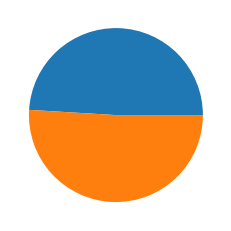

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_count)


## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_group = mouse_study.sort_values(['Drug Regimen', 'Mouse ID', 'Timepoint'])
final_tumor_volume = regimen_group.loc[regimen_group['Timepoint'] == 45]

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html
# https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

top_regimens = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

top_regimens
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
440,i557,Capomulin,Female,1,24,45,47.685963,1
...,...,...,...,...,...,...,...,...
420,q597,Ramicane,Male,20,25,45,45.220869,2
234,r811,Ramicane,Male,9,19,45,37.225650,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
410,u196,Ramicane,Male,18,25,45,40.667713,3


In [55]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
# tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = top_regimens['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

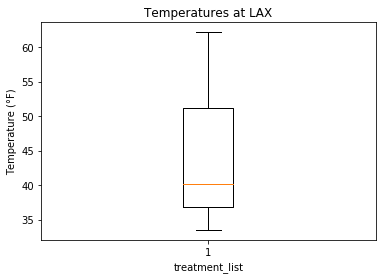

In [57]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.set_xlabel('treatment_list')
ax1.boxplot(quartiles)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
